# Assignment 2
### CSC 478
#### Kristen Groom
#### 4/27/18

#### 1) K-Nearest-Neighbor (KNN) classification on Newsgroups


For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn for classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python libraries, and Matplotlib

#### a) Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [1]:
# import needed libraries for assignment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# first task is to read in the data:
# reading in the training data:
news_training_matrix = pd.read_csv("newsgroups/trainMatrixModified.txt", header=None, sep='\t')

news_training_matrix.shape

(5500, 800)

In [12]:
news_training_matrix.head(10)

0    1    2    3    4    5    6    7    8    9   ...   790  791  792  793  \
0  2.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  3.0  0.0   
2  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0 ...   1.0  1.0  1.0  1.0   
4  8.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  2.0  0.0   
5  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   2.0  0.0  0.0  0.0   
7  8.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   2.0  0.0  0.0  0.0   
8  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9  4.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   

   794  795  796  797  798  799  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  
7  0.0  0.0  0.0  0.0  0.0  0.0  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  1.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 800 columns]

In [13]:
# reading in the test data:
news_test_matrix = pd.read_csv("newsgroups/testMatrixModified.txt", header=None, sep='\t')

news_test_matrix.shape

(5500, 200)

In [171]:
news_test_matrix.head(10)

0    1    2    3    4    5    6    7    8    9   ...   190  191  192  193  \
0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  1.0  1.0 ...   1.0  2.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0 ...   0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  1.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  3.0  0.0  0.0   

   194  195  196  197  198  199  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  
7  3.0  0.0  0.0  0.0  0.0  0.0  
8  0.0  0.0  0.0  0.0  0.0  0.0  
9  0.0  1.0  0.0  0.0  1.0  0.0  

[10 rows x 200 columns]

In [15]:
# read in the categories/labels from the training data
news_target_train = pd.read_csv("newsgroups/trainClasses.txt", header=None, sep='\t', index_col=0)

news_target_train.shape

(800, 1)

In [16]:
news_target_train.head(10)

1
0   
0  0
1  1
2  0
3  1
4  0
5  1
6  1
7  1
8  1
9  1

In [17]:
# read in classes from test data
news_target_test = pd.read_csv("newsgroups/testClasses.txt", header=None, sep='\t', index_col=0)
news_target_test.shape

(200, 1)

In [18]:
news_target_test.head(10)

1
0   
0  1
1  0
2  0
3  1
4  1
5  0
6  1
7  1
8  0
9  1

In [19]:
# Because our kNN classifier uses numpy array as input, we need to transform DataFrames into np arrays
# and be sure to transpose so that they are document/text matrixes

# training data into np.array
DT_news_train = np.array(news_training_matrix).T
DT_news_train.shape

(800, 5500)

In [20]:
DT_news_train[:5, :10]

array([[ 2.,  2.,  2.,  1.,  8.,  6.,  2.,  8.,  2.,  4.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  1.],
       [ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [21]:
# test data into np.array
DT_news_test = np.array(news_test_matrix).T
DT_news_test.shape

(200, 5500)

In [22]:
DT_news_test[:5, :10]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [23]:
# also put our target class data into np array
# training data:
train_labels = np.array(news_target_train)
print len(train_labels)
train_labels[:10]

800


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [24]:
# I found that for the knn classifier to work, I would need to have the labels
# in the form of one np.array with 800 elements so 
# I basically transposed the above array
train_labels = np.array(train_labels[:,0])
train_labels[:10]

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [25]:
len(train_labels)

800

In [26]:
# test data:
test_labels = np.array(news_target_test)
print len(test_labels)
test_labels[:10]

200


array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [27]:
# again transforming test_labels to work with the knn classifier
test_labels = np.array(test_labels[:,0])
test_labels[:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [28]:
len(test_labels)

200

In [29]:
# now we have our data in the correct format to use our knn classifier
# I'm using our professor's algorithm as my base structure but I will need to add 
# the ability to use labels as a parameter so that it will return the predicted class for each
# document in the test data, and should also output the nearest k neighbors.  
# I can keep the indexes of the nearest neighbors as is in this algorithm

In [30]:
# import operator module to use in below knn_search
import operator

In [55]:
def knn_search(x, D, labels, K, measure): 
    # measure can be either 0/1 depending on which metrics we want to use to determine
    # similarity(distance) - this function always uses distance so 0 is euclidean distance
    # and 1 is 1-cosine similarity, which gives us distance
    # x is a query of words
    # D is the Data Structure
    # K is number of nearest neighbors that we specify
    # then we choose the measure we want to use
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        distances = np.sqrt(((D - x)**2).sum(axis=1)) 
        # rather than doing a bunch of loops, this goes row by row
        # comparing the difference between each row and x
        # the result of this is a 1D np.array dists - which contains the distances between our vector x 
        # and each of the other rows in D
    elif measure == 1:
        # using cosine similarity - actually (1 - cosine similarity)
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))]) 
        # first compute norm of each one of the rows
        # in D - compute dot product of each row with x, then divide that by norm of x, and norm of row(see below)
        # in numpy - using the linalg module - linear algebra, which has norm function
        # doing that for each one of the rows in D and putting that in D_norm
        x_norm = np.linalg.norm(x)
        # getting norm of x
        sims = np.dot(D,x)/(D_norm * x_norm)
        # then we got the dot product of each row in D, with x - gives us an array of dot products:
        # Then we divided these individual numbers(elements in the array) 
        # with D_norm(so norm of each individual row in D with norm of x) multiplied by x_norm
        # this total calculation gives us an array of cosine similarities
        distances = 1 - sims 
        # now we get the distances by finding the inverse of the similarites
        # so we now have an array of distances similar to the euclidean calculation above
        
    # now sort in increasing order - most similar or least distance(smallest nums)
    # at the beginning of the array and assign this array to idx  
    idx = np.argsort(distances) 

    # we need to now use our target labels so that we can find the predicted value for x
    # from our k nearest neighbors in the sorted distances array: idx
    # using the example of knn.py from the textbook and professor's notes 
    # to find the predicted value for x:
    
    classCount = {}
    # creates a dictionary of counts of 0's and 1's to determine which is predicted most
    # the following code is a simple vote approach, not weighted distances
    for i in range(K):
        voteIlabel = labels[idx[i]]
        # add to the count of the label or retun 1 for first occurrence
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # Dictionary will be ordered in decreasing order of the label values 
    # the majority class label will be the first dictonary element - will have two elements, how many 0's and how many 1's
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    
    # return the indexes of K nearest neighbors, and return the predicted class
    return idx[:K], sortedClassCount[0][0], sorted(distances)[:K] # adding sorted distances just for debugging

In [56]:
# testing our classifier
x = DT_news_test[0]
print x[:10]

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]


In [57]:
classifierNeighbors, prediction, distances = knn_search(x, DT_news_train, train_labels, 5, 1)

In [58]:
classifierNeighbors

array([685, 628, 667, 152, 427])

In [59]:
prediction

1

In [60]:
print train_labels[685], train_labels[628], train_labels[667], train_labels[152], train_labels[427]

1 1 1 1 1


In [61]:
distances # I added this return value b/c I wasn't sure if I was doing this correctly so 
# I wanted to see if the distances were in correct order at least

[0.45645870668145117,
 0.57680202417549764,
 0.65436090573100536,
 0.65693824730614692,
 0.67243379374257983]

In [62]:
# trying with Euclidean distance
classifierNeighbors, prediction, distances = knn_search(x, DT_news_train, train_labels, 5, 0)

In [63]:
classifierNeighbors

array([685, 628, 703, 266, 510])

In [66]:
# finding the predicted class
def predictedClass(prediction):
    if prediction==1.:
        prediction = "Hockey"
    else:
        prediction = "Microsoft Windows"
    return "The predicted class is {}".format(prediction)

In [67]:
predictedClass(prediction)

'The predicted class is Hockey'

#### b) Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [80]:
# using accuracy function based on one from our class notes
def classAccuracy(trainingData, trainingLabels, K, measure, testData, testLabels):
    # first get the length of the data we are testing for accuracy
    numTestVecs = len(testData)
    # initialize the error count to 0.0
    errorCount = 0.0
    # not test for accuracy for each vector in the test set using the known labels
    for i in range(numTestVecs):
        # call our knn_search classifier for each vector in test data
        classifierNeighbors, prediction, distances = knn_search(testData[i], trainingData, trainingLabels, K, measure)
        # compare the predicted label with our known label
        # if they are not equal then we add 1 to our error count
        if (prediction != testLabels[i]): errorCount += 1.0
    # the formula for error rate is the total error count divided by the number of 
    # our total test vectors or the length of the testData
    errorRate = errorCount/float(numTestVecs)
#     print "the total error rate is: %f" % (errorRate)
    return errorRate

In [81]:
classAccuracy(DT_news_train, train_labels, 5, 1, DT_news_test, test_labels)

0.03

In [82]:
classAccuracy(DT_news_train, train_labels, 5, 1, DT_news_train, train_labels)

0.01125

#### c) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [74]:
# I'm returning the errorRate in the above function classAccuracy so I can create a table
# so I can loop through different k values and compare Euclidean Distance and Cosine Similarity results

In [136]:
k=21

eucMes = [classAccuracy(DT_news_train, train_labels, i, 0, DT_news_test, test_labels) for i in range(1, k)]
cosineMes = [classAccuracy(DT_news_train, train_labels, i, 1, DT_news_test, test_labels) for i in range(1, k)]
idx = [i for i in range(1, k)]

print "Euclidean = {}".format(eucMes)
print "Cosine = {}".format(cosineMes)
print "K = {}".format(idx)


Euclidean = [0.22, 0.215, 0.19, 0.23, 0.185, 0.255, 0.235, 0.27, 0.25, 0.295, 0.205, 0.275, 0.225, 0.26, 0.215, 0.27, 0.24, 0.275, 0.26, 0.29]
Cosine = [0.015, 0.04, 0.03, 0.035, 0.03, 0.02, 0.02, 0.03, 0.025, 0.025, 0.02, 0.03, 0.02, 0.03, 0.015, 0.025, 0.025, 0.025, 0.025, 0.025]
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [145]:
# creating a list of tuples of the three values: euclidean results, cosine results, and k
measuresData = list(zip(idx,eucMes, cosineMes))
type(measuresData[0])

tuple

In [146]:
measuresData

[(1, 0.22, 0.015),
 (2, 0.215, 0.04),
 (3, 0.19, 0.03),
 (4, 0.23, 0.035),
 (5, 0.185, 0.03),
 (6, 0.255, 0.02),
 (7, 0.235, 0.02),
 (8, 0.27, 0.03),
 (9, 0.25, 0.025),
 (10, 0.295, 0.025),
 (11, 0.205, 0.02),
 (12, 0.275, 0.03),
 (13, 0.225, 0.02),
 (14, 0.26, 0.03),
 (15, 0.215, 0.015),
 (16, 0.27, 0.025),
 (17, 0.24, 0.025),
 (18, 0.275, 0.025),
 (19, 0.26, 0.025),
 (20, 0.29, 0.025)]

In [147]:
df = pd.DataFrame(data = measuresData, columns=['K', 'Euclidean', 'Cosine_Similarity'])
df.set_index('K', inplace=True)

df

Euclidean  Cosine_Similarity
K                               
1       0.220              0.015
2       0.215              0.040
3       0.190              0.030
4       0.230              0.035
5       0.185              0.030
6       0.255              0.020
7       0.235              0.020
8       0.270              0.030
9       0.250              0.025
10      0.295              0.025
11      0.205              0.020
12      0.275              0.030
13      0.225              0.020
14      0.260              0.030
15      0.215              0.015
16      0.270              0.025
17      0.240              0.025
18      0.275              0.025
19      0.260              0.025
20      0.290              0.025

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a8e350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b4fe90>]], dtype=object)

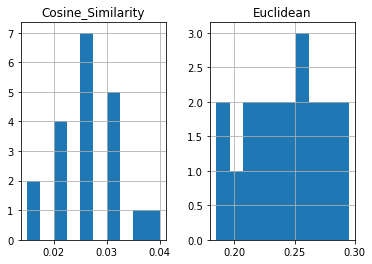

In [140]:
df.hist()

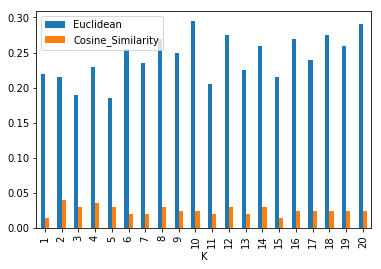

In [142]:
plt.show(df.plot(kind="bar"))
# doesn't really tell us anything because the values are not normalized

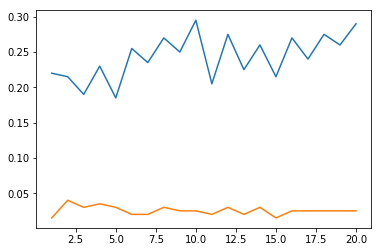

In [148]:
import matplotlib.pyplot as plt
plt.plot(df)
plt.show()

The results from our comparison shows that cosine_similarity seems to be giving more accurate results.  I can also see that more neighbors in this case does not necessarily lead to more accurate results.  Using 5 neighbors would give us at least as accurate of a result as more neighbors.

#### d) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [150]:
# we always use the training data to create TFxIDF weights as discussed in class
# so I need to find get the number of docs into a variable to use in the transformation
numTerms=news_training_matrix.shape[0]
numDocs = news_training_matrix.shape[1]
print "Number of terms in training data: {}".format(numTerms)
print "number of documents in training data: {}".format(numDocs)

Number of terms in training data: 5500
number of documents in training data: 800


In [155]:
# I'll start TFxIDF by finding the document frequency
# The document frequency (df) for a term t is the number of docs in which t appears 
# we will then need to divide total number of docs by this number
# so the formula is: N/nt - but first finding nt = doc frequency - number of documents that contain that term

# first let's find the document count for each of the terms in our training data
docFrequency = np.array([(news_training_matrix!=0).sum(1)]).T

# this gives me an np.array of document frequency values which we transposed to give us one column of 
# values which are the number of documents that contain each term
print docFrequency[:10]
len(docFrequency)

[[ 50]
 [  7]
 [ 10]
 [800]
 [108]
 [ 32]
 [ 52]
 [ 47]
 [ 27]
 [199]]


5500

In [160]:
# The next step is to create a matrix with all of the entries equal to the total number
# of documents.  This is N in the formula N/nt

# We do this by creating a matrix the same shape as our training data with all 1's
# but then we're multiplying each entry by the number of documents which in this case is 800 
# We need the total num of docs so that we can divide by df(nt) then multiply this by log2 (see cells below)

NMatrix=np.ones(np.shape(news_training_matrix), dtype=float)*numDocs
# professor gave us these print options to look at our np.array:
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]


In [163]:
NMatrix.shape

(5500, 800)

In [157]:
# This step is to convert each of our entries now into IDF values
# this is done by taking the log of N/nt

# first divide our NMatrix by document frequencies, each row should be the same
dfDivN = np.divide(NMatrix, docFrequency)

# now get the log of this value - can be done in one step as shown in class but 
# I'm doing in two steps for my own learning purposes

IDF = np.log2(dfDivN)

print IDF[:15, :15]

[[ 4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.  ]
 [ 6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84]
 [ 6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89]
 [ 4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64]
 [ 3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89]
 [ 2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01]
 [ 3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3

In [161]:
# The final step for converting the values are to multiply the original term frequencies 
# which are the values in the original training data news_training_matrix,
# with IDF values

# this is the tfidf matrix:

trainData_tfidf = news_training_matrix * IDF

In [162]:
# professor gave us the following code to set precision for displaying our values
pd.set_option("display.precision", 2) # set the prceision to two decimal points for each value so we don't get crazy nums

trainData_tfidf.head(10)

0     1     2    3    4    5    6     7    8    9    ...    790  791  \
0   8.00  0.00  0.00  8.0  8.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
1  13.67  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
2  12.64  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
3   0.00  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
4  23.11  2.89  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
5  27.86  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
6   7.89  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   7.89  0.0   
7  32.71  0.00  8.18  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   8.18  0.0   
8   9.78  0.00  0.00  0.0  0.0  0.0  0.0  0.00  0.0  0.0  ...   0.00  0.0   
9   8.03  0.00  2.01  0.0  0.0  0.0  0.0  4.01  0.0  0.0  ...   0.00  0.0   

     792  793   794  795  796  797  798   799  
0   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
1  20.51  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
2   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
3   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
4   5.78  0.0  0.00  0.0  0.0  0.0  0.0  2.89  
5   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
6   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
7   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
8   0.00  0.0  0.00  0.0  0.0  0.0  0.0  0.00  
9   2.01  0.0  2.01  0.0  0.0  0.0  0.0  0.00  

[10 rows x 800 columns]

In [164]:
# now convert the test data, but using the document frequency/IDF values from the training data

# Once again, we do this by creating a matrix the same shape as our test data now with all 1's
# but then we're multiplying each entry by the number of documents which is still 800 b/c we're using training data 

NMatrix=np.ones(np.shape(news_test_matrix), dtype=float)*numDocs
# still using print options from class
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print NMatrix

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]


In [166]:
# We see that the shape is of the test data but still using training values
NMatrix.shape

(5500, 200)

In [167]:
# Convert each of our entries now into IDF values for test data

# doing the division and log in one step
IDF = np.log2(np.divide(NMatrix, docFrequency))

print IDF[:15, :15]

[[ 4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.    4.  ]
 [ 6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84  6.84]
 [ 6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32  6.32]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89  2.89]
 [ 4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64  4.64]
 [ 3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94  3.94]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89  4.89]
 [ 2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01  2.01]
 [ 3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3.81  3

In [168]:
IDF.shape

(5500, 200)

In [169]:
# Finally, multiply the original term frequencies 
# from news_test_matrix by the IDF values from the training data
# and we'll have our transformed tfidf test data matrix

testData_tfidf = news_test_matrix * IDF

In [170]:
# Displaying our values
pd.set_option("display.precision", 2) 
testData_tfidf.head(10)

0    1    2    3     4    5     6    7     8    9   ...   190   191  192  \
0  0.00  0.0  4.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
1  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
2  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
3  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
4  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  5.78  0.0 ...   0.0  0.00  0.0   
5  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
6  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  3.94  0.0   
7  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
8  0.00  0.0  0.0  0.0  0.00  0.0  0.00  0.0  0.00  0.0 ...   0.0  0.00  0.0   
9  2.01  0.0  0.0  0.0  2.01  0.0  2.01  0.0  0.00  0.0 ...   0.0  6.02  0.0   

    193    194   195  196  197   198  199  
0  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
1  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
2  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
3  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
4  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
5  4.64   0.00  0.00  0.0  0.0  0.00  0.0  
6  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
7  0.00  12.27  0.00  0.0  0.0  0.00  0.0  
8  0.00   0.00  0.00  0.0  0.0  0.00  0.0  
9  0.00   0.00  2.01  0.0  0.0  2.01  0.0  

[10 rows x 200 columns]

In [173]:
# Once again, I need to get the dataFrames into the correct np.array format so that our classifier can use this
# *remember to transpose so that they are document/text matrixes

# tfidf training data into np.array
DT_train_tfidf = np.array(trainData_tfidf).T
DT_train_tfidf.shape

(800, 5500)

In [174]:
# tfidf training data into np.array
DT_test_tfidf = np.array(testData_tfidf).T
DT_test_tfidf.shape

(200, 5500)

In [175]:
# now that we have the transformed values, we can check our classifier accuracy once again: 

k=21

eucMes = [classAccuracy(DT_train_tfidf, train_labels, i, 0, DT_test_tfidf, test_labels) for i in range(1, k)]
cosineMes = [classAccuracy(DT_train_tfidf, train_labels, i, 1, DT_test_tfidf, test_labels) for i in range(1, k)]
idx = [i for i in range(1, k)]

print "Euclidean = {}".format(eucMes)
print "Cosine = {}".format(cosineMes)
print "K = {}".format(idx)


Euclidean = [0.29, 0.26, 0.25, 0.21, 0.2, 0.29, 0.27, 0.335, 0.32, 0.375, 0.32, 0.37, 0.35, 0.4, 0.38, 0.425, 0.385, 0.415, 0.37, 0.41]
Cosine = [0.055, 0.045, 0.02, 0.03, 0.02, 0.02, 0.015, 0.01, 0.01, 0.005, 0.01, 0.01, 0.01, 0.01, 0.01, 0.005, 0.01, 0.01, 0.005, 0.005]
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [181]:
# Getting values into list of tuples for easier formatting in dataFrame
tfidf_measuresData = list(zip(idx,eucMes, cosineMes))

In [182]:
df = pd.DataFrame(data = tfidf_measuresData, columns=['K', 'Euclidean', 'Cosine_Similarity'])
df.set_index('K', inplace=True)

df

Euclidean  Cosine_Similarity
K                               
1        0.29           5.50e-02
2        0.26           4.50e-02
3        0.25           2.00e-02
4        0.21           3.00e-02
5        0.20           2.00e-02
6        0.29           2.00e-02
7        0.27           1.50e-02
8        0.34           1.00e-02
9        0.32           1.00e-02
10       0.38           5.00e-03
11       0.32           1.00e-02
12       0.37           1.00e-02
13       0.35           1.00e-02
14       0.40           1.00e-02
15       0.38           1.00e-02
16       0.42           5.00e-03
17       0.39           1.00e-02
18       0.41           1.00e-02
19       0.37           5.00e-03
20       0.41           5.00e-03

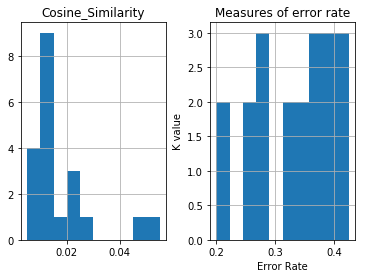

In [184]:
df.hist()
plt.title("Measures of error rate")
plt.xlabel("Error Rate")
plt.ylabel("K value")
plt.show()

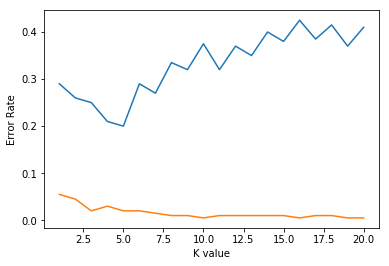

In [186]:
plt.plot(df)
plt.xlabel("K value")
plt.ylabel("Error Rate")
plt.show()

In looking at the error rates of the raw data vs the transformed data, I'm actually seeing less accuracy with Euclidean distance metric when using tfidf transformed data and as the k value increases, so does the error rate when using Euclidean distance in our data set.  Cosine Similarity measures error rates are similar for raw data vs transformed data but I am actually seeing the error rate decreases slightly with increasing k values.

#### e) Create a new classifier based on the Rocchio Method adapted for text categorization. You should separate the training function from the classifiation function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [250]:
print numTerms
print numDocs

5500
800


In [348]:
# Start by creating a training function:

def rocchioTrain(DT_train_tfidf, train_labels):
    # using the slides: 
    # Assume the set of categories is {c1, c2,…cn}
    # these are the number of terms in our case

    # For i from 1 to n let pi = <0, 0,…,0>  (init. prototype vectors)
    prototypeMS = np.zeros(numTerms)
    prototypeHockey = np.zeros(numTerms)

    # create np arrays for Microsoft Windows- 0's
    MSArray = np.zeros(shape=(numDocs,numTerms))
    
    # create np arrays for Hockey - 1's
    hockeyArray = np.zeros(shape=(numDocs,numTerms))

    # now fill each np.array with appropriate documents:   
    for i in range(numDocs):

        if train_labels[i]==0:
            MSArray[i] = DT_train_tfidf[i]
        else:
            hockeyArray[i] = DT_train_tfidf[i]
    
    # now sum the vectors:    
    prototypeMS = MSArray.sum(axis=0)
    prototypeHockey = hockeyArray.sum(axis=0)
    
    #printing out the prototypes
    
    print prototypeMS
    print prototypeHockey
    
    return prototypeMS, prototypeHockey

In [349]:
prototypeMS, prototypeHockey = rocchioTrain(DT_train_tfidf, train_labels)

[ 228.     27.35   31.61 ...,    8.64   17.29   17.29]
[ 180.     47.86  107.47 ...,    8.64    0.      0.  ]


In [352]:
prototypes = np.array([prototypeMS, prototypeHockey])

In [376]:
# now create the classification algorithm
def rocchioClass(x, prototypes):
    """ compare cosine-similarity for instance x between the prototypes """
    # first find the vector norm for each instance in prototypes as well as the norm for vector x
    D_norm = np.array([np.linalg.norm(prototypes[i]) for i in range(len(prototypes))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(prototypes,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    
    # this gives us the index of the most similar prototype
    idx = np.argsort(dists) # sorting
        
    return idx[0], dists

In [377]:
rocchioClass(DT_train_tfidf[1], prototypes)

(1, array([ 0.95,  0.84]))

In [380]:
# revamping accuracy function from above
def rocchioAccuracy(testData, testLabels, prototypes):
    # first get the length of the data we are testing for accuracy
    numTestVecs = len(testData)
    # initialize the error count to 0.0
    errorCount = 0.0
    # not test for accuracy for each vector in the test set using the known labels
    for i in range(numTestVecs):
        # call rocchioClass for each vector in test data
        prediction, distances = rocchioClass(testData[i], prototypes)
        # compare the predicted label with our known label
        # if they are not equal then we add 1 to our error count
        if (prediction != testLabels[i]): errorCount += 1.0
    # the formula for error rate is the total error count divided by the number of 
    # our total test vectors or the length of the testData
    errorRate = errorCount/float(numTestVecs)
    print "the total error rate is: %f" % (errorRate)
    return errorRate

In [381]:
rocchioAccuracy(DT_test_tfidf, test_labels, prototypes)

the total error rate is: 0.020000


0.02

The total error rate using the rocchio approach was the same value as the knn_search classification above when k=5 or k=6.  So according to these classification techniques, they were very comparable as far as accuracy goes, however, rocchio seems to be a simpler and less expensive technique to use due to the use of comparing only two prototypes vs. comparing an entire data set.  There was more work in figuring out the training algorithm so that may take up space, but the classification was very quick, as was the accuracy algorithm.

#### 2) Classification using scikit-learn
#### For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.


#### Your tasks in this problem are the following:

#### a) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [407]:
bdtable = pd.read_csv("bank_data.csv", index_col=0)
# index info at column 0

bdtable.head(10)

age    income  children  gender      region married  car  \
id                                                                  
ID12101   48  17546.00         1  FEMALE  INNER_CITY      NO   NO   
ID12102   40  30085.10         3    MALE        TOWN     YES  YES   
ID12103   51  16575.40         0  FEMALE  INNER_CITY     YES  YES   
ID12104   23  20375.40         3  FEMALE        TOWN     YES   NO   
ID12105   57  50576.30         0  FEMALE       RURAL     YES   NO   
ID12106   57  37869.60         2  FEMALE        TOWN     YES   NO   
ID12107   22   8877.07         0    MALE       RURAL      NO   NO   
ID12108   58  24946.60         0    MALE        TOWN     YES  YES   
ID12109   37  25304.30         2  FEMALE    SUBURBAN     YES  YES   
ID12110   54  24212.10         2    MALE        TOWN     YES  YES   

        savings_acct current_acct mortgage  pep  
id                                               
ID12101           NO           NO       NO  YES  
ID12102           NO          YES      YES   NO  
ID12103          YES          YES       NO   NO  
ID12104           NO          YES       NO   NO  
ID12105          YES           NO       NO   NO  
ID12106          YES          YES       NO  YES  
ID12107           NO          YES       NO  YES  
ID12108          YES          YES       NO   NO  
ID12109           NO           NO       NO   NO  
ID12110          YES          YES       NO   NO

We will be splitting the data into a test and training data sets for classification.¶

In [408]:
# each time you run this - you will get different permutations so be aware of that
# this will randomly reorganize the data so we can split into two data sets
bd = bdtable.reindex(np.random.permutation(bdtable.index)) 
bd.head(10)


age   income  children  gender      region married  car savings_acct  \
id                                                                              
ID12681   63  51879.3         2    MALE    SUBURBAN     YES  YES          YES   
ID12475   67  47198.6         2  FEMALE    SUBURBAN     YES   NO          YES   
ID12567   38  21876.5         0    MALE  INNER_CITY     YES   NO           NO   
ID12351   65  57671.7         0    MALE  INNER_CITY      NO   NO          YES   
ID12513   67  58092.0         2  FEMALE  INNER_CITY      NO  YES          YES   
ID12573   61  21139.8         2    MALE  INNER_CITY     YES  YES          YES   
ID12530   35  27863.9         2    MALE       RURAL      NO   NO          YES   
ID12369   63  34625.2         0  FEMALE        TOWN     YES  YES           NO   
ID12647   27  15281.8         0  FEMALE  INNER_CITY      NO  YES           NO   
ID12414   18  16109.9         2  FEMALE       RURAL      NO  YES          YES   

        current_acct mortgage  pep  
id                                  
ID12681           NO      YES  YES  
ID12475          YES       NO  YES  
ID12567          YES       NO   NO  
ID12351          YES      YES   NO  
ID12513          YES       NO  YES  
ID12573           NO       NO   NO  
ID12530          YES      YES   NO  
ID12369          YES       NO   NO  
ID12647           NO      YES  YES  
ID12414          YES       NO   NO

In [409]:
# be sure to put the target column in its own variable
# just looking at column names first
bd_names = bd.columns.values
bd_names

array(['age', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage',
       'pep'], dtype=object)

In [410]:
# ok, we see pep is the target var that we want to predict so we can put it into its own variable
bd_target = bd.pep 

In [411]:
bd_target.head(10)

id
ID12681    YES
ID12475    YES
ID12567     NO
ID12351     NO
ID12513    YES
ID12573     NO
ID12530     NO
ID12369     NO
ID12647    YES
ID12414     NO
Name: pep, dtype: object

In [412]:
bd.head(5)

age   income  children  gender      region married  car savings_acct  \
id                                                                              
ID12681   63  51879.3         2    MALE    SUBURBAN     YES  YES          YES   
ID12475   67  47198.6         2  FEMALE    SUBURBAN     YES   NO          YES   
ID12567   38  21876.5         0    MALE  INNER_CITY     YES   NO           NO   
ID12351   65  57671.7         0    MALE  INNER_CITY      NO   NO          YES   
ID12513   67  58092.0         2  FEMALE  INNER_CITY      NO  YES          YES   

        current_acct mortgage  pep  
id                                  
ID12681           NO      YES  YES  
ID12475          YES       NO  YES  
ID12567          YES       NO   NO  
ID12351          YES      YES   NO  
ID12513          YES       NO  YES

In [414]:
# Now we can convert the table into standard spreadsheet format with dummie vars
bd = pd.get_dummies(bd[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]) 
# left out pep b/c this is 
# our target 
bd.head(10)

age   income  children  gender_FEMALE  gender_MALE  \
id                                                            
ID12681   63  51879.3         2              0            1   
ID12475   67  47198.6         2              1            0   
ID12567   38  21876.5         0              0            1   
ID12351   65  57671.7         0              0            1   
ID12513   67  58092.0         2              1            0   
ID12573   61  21139.8         2              0            1   
ID12530   35  27863.9         2              0            1   
ID12369   63  34625.2         0              1            0   
ID12647   27  15281.8         0              1            0   
ID12414   18  16109.9         2              1            0   

         region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
id                                                                       
ID12681                  0             0                1            0   
ID12475                  0             0                1            0   
ID12567                  1             0                0            0   
ID12351                  1             0                0            0   
ID12513                  1             0                0            0   
ID12573                  1             0                0            0   
ID12530                  0             1                0            0   
ID12369                  0             0                0            1   
ID12647                  1             0                0            0   
ID12414                  0             1                0            0   

         married_NO  married_YES  car_NO  car_YES  savings_acct_NO  \
id                                                                   
ID12681           0            1       0        1                0   
ID12475           0            1       1        0                0   
ID12567           0            1       1        0                1   
ID12351           1            0       1        0                0   
ID12513           1            0       0        1                0   
ID12573           0            1       0        1                0   
ID12530           1            0       1        0                0   
ID12369           0            1       0        1                1   
ID12647           1            0       0        1                1   
ID12414           1            0       0        1                0   

         savings_acct_YES  current_acct_NO  current_acct_YES  mortgage_NO  \
id                                                                          
ID12681                 1                1                 0            0   
ID12475                 1                0                 1            1   
ID12567                 0                0                 1            1   
ID12351                 1                0                 1            0   
ID12513                 1                0                 1            1   
ID12573                 1                1                 0            1   
ID12530                 1                0                 1            0   
ID12369                 0                0                 1            1   
ID12647                 0                1                 0            0   
ID12414                 1                0                 1            1   

         mortgage_YES  
id                     
ID12681             1  
ID12475             0  
ID12567             0  
ID12351             1  
ID12513             0  
ID12573             0  
ID12530             1  
ID12369             0  
ID12647             1  
ID12414             0

In [415]:
# we can now split the data into test and training sets
# ***remember to split target attribute

# since we already randomized, we will just take the first 80% as training set
# and the last 20% for testing - using formula's from class notes:
tpercent = 0.8
tsize = int(np.floor(tpercent * len(bd))) # floor is the closest integer less than tpercent * len(vs)
bd_train = bd[:tsize] # this gives us 80% of the data as training set
bd_test = bd[tsize:] # this gives us %20 of the data as the test set

In [416]:
# make sure the sizes add up correctly
print bd_train.shape
print bd_test.shape

(480, 19)
(120, 19)


In [417]:
bd_train.head(10)

age   income  children  gender_FEMALE  gender_MALE  \
id                                                            
ID12681   63  51879.3         2              0            1   
ID12475   67  47198.6         2              1            0   
ID12567   38  21876.5         0              0            1   
ID12351   65  57671.7         0              0            1   
ID12513   67  58092.0         2              1            0   
ID12573   61  21139.8         2              0            1   
ID12530   35  27863.9         2              0            1   
ID12369   63  34625.2         0              1            0   
ID12647   27  15281.8         0              1            0   
ID12414   18  16109.9         2              1            0   

         region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
id                                                                       
ID12681                  0             0                1            0   
ID12475                  0             0                1            0   
ID12567                  1             0                0            0   
ID12351                  1             0                0            0   
ID12513                  1             0                0            0   
ID12573                  1             0                0            0   
ID12530                  0             1                0            0   
ID12369                  0             0                0            1   
ID12647                  1             0                0            0   
ID12414                  0             1                0            0   

         married_NO  married_YES  car_NO  car_YES  savings_acct_NO  \
id                                                                   
ID12681           0            1       0        1                0   
ID12475           0            1       1        0                0   
ID12567           0            1       1        0                1   
ID12351           1            0       1        0                0   
ID12513           1            0       0        1                0   
ID12573           0            1       0        1                0   
ID12530           1            0       1        0                0   
ID12369           0            1       0        1                1   
ID12647           1            0       0        1                1   
ID12414           1            0       0        1                0   

         savings_acct_YES  current_acct_NO  current_acct_YES  mortgage_NO  \
id                                                                          
ID12681                 1                1                 0            0   
ID12475                 1                0                 1            1   
ID12567                 0                0                 1            1   
ID12351                 1                0                 1            0   
ID12513                 1                0                 1            1   
ID12573                 1                1                 0            1   
ID12530                 1                0                 1            0   
ID12369                 0                0                 1            1   
ID12647                 0                1                 0            0   
ID12414                 1                0                 1            1   

         mortgage_YES  
id                     
ID12681             1  
ID12475             0  
ID12567             0  
ID12351             1  
ID12513             0  
ID12573             0  
ID12530             1  
ID12369             0  
ID12647             1  
ID12414             0

In [418]:
bd_test.head(10)

age   income  children  gender_FEMALE  gender_MALE  \
id                                                            
ID12532   64  58367.3         1              1            0   
ID12316   27  17610.3         0              0            1   
ID12214   36  33630.6         2              0            1   
ID12662   25  23287.9         0              1            0   
ID12640   19  10191.8         0              0            1   
ID12447   50  39745.3         0              0            1   
ID12382   18  15610.2         0              1            0   
ID12200   18  15348.9         0              1            0   
ID12378   25  22366.1         1              0            1   
ID12682   20  12644.9         2              0            1   

         region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  \
id                                                                       
ID12532                  0             0                0            1   
ID12316                  0             0                1            0   
ID12214                  0             0                0            1   
ID12662                  0             0                1            0   
ID12640                  1             0                0            0   
ID12447                  0             1                0            0   
ID12382                  1             0                0            0   
ID12200                  0             1                0            0   
ID12378                  0             0                0            1   
ID12682                  0             0                0            1   

         married_NO  married_YES  car_NO  car_YES  savings_acct_NO  \
id                                                                   
ID12532           0            1       0        1                0   
ID12316           0            1       1        0                0   
ID12214           1            0       0        1                0   
ID12662           1            0       1        0                1   
ID12640           0            1       1        0                0   
ID12447           0            1       0        1                0   
ID12382           0            1       1        0                0   
ID12200           0            1       0        1                1   
ID12378           0            1       0        1                0   
ID12682           0            1       0        1                1   

         savings_acct_YES  current_acct_NO  current_acct_YES  mortgage_NO  \
id                                                                          
ID12532                 1                0                 1            1   
ID12316                 1                0                 1            1   
ID12214                 1                0                 1            1   
ID12662                 0                0                 1            0   
ID12640                 1                0                 1            0   
ID12447                 1                1                 0            0   
ID12382                 1                0                 1            1   
ID12200                 0                0                 1            1   
ID12378                 1                0                 1            1   
ID12682                 0                0                 1            0   

         mortgage_YES  
id                     
ID12532             0  
ID12316             0  
ID12214             0  
ID12662             1  
ID12640             1  
ID12447             1  
ID12382             0  
ID12200             0  
ID12378             0  
ID12682             1

In [420]:
# Split the target attributes as well
bd_target_train = bd_target[0:int(tsize)] # again using the percentages from above formula
bd_target_test = bd_target[int(tsize):len(bd)]

In [421]:
bd_target_train.head()

id
ID12681    YES
ID12475    YES
ID12567     NO
ID12351     NO
ID12513    YES
Name: pep, dtype: object

In [422]:
bd_target_test.head()

id
ID12532    YES
ID12316     NO
ID12214    YES
ID12662    YES
ID12640    YES
Name: pep, dtype: object

In [423]:
# everything looks correct so moving on
# normalization process using sklearn
from sklearn import preprocessing

In [425]:
# we first create an instance of MinMaxScaler() to use to fit data
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(bd_train)
# We are only using the training data because when you are trying to build a model - you must assume that you only
# see the training data, and nothing else.  Must go with what you have.  Same principle applies when you are building a
# model - assume that this is all the data that you have. Consequence is that the min/max may be different - could happen
# So this sets the values in the formula for minimum and maximum from the training data

MinMaxScaler(copy=True, feature_range=(0, 1))

In [426]:
# transform the data using the min-max object
bd_train_norm = min_max_scaler.fit_transform(bd_train)
bd_test_norm = min_max_scaler.fit_transform(bd_test)

In [430]:
np.set_printoptions(precision=2, linewidth=100)
bd_test_norm[:10]

array([[ 0.94,  0.96,  0.33,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.18,  0.19,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.37,  0.49,  0.67,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.14,  0.29,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.02,  0.05,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.65,  0.6 ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.15,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
 

In [431]:
np.set_printoptions(precision=2, linewidth=100)
bd_train_norm[:10]

array([[ 0.92,  0.81,  0.67,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.73,  0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.41,  0.29,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.96,  0.91,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 1.  ,  0.91,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.88,  0.28,  0.67,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.35,  0.39,  0.67,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
 

In [432]:
# also convert training and test target arrays into np.arrays
bd_target_train = np.array(bd_target_train)
bd_target_test = np.array(bd_target_test)

In [434]:
print bd_target_train[:10]

['YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO']


In [435]:
print bd_target_test[:10]

['YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO']


In [436]:
from sklearn import neighbors, tree, naive_bayes

#### b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, compute the average accuracy score. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [673]:
# using class notes to perform various knn classification, with or without weights
n_neighbors = 8

knnclf = neighbors.KNeighborsClassifier(n_neighbors) # if you dont specify, it will not use weights
# if do specify, then will count the votes of some neighbors that are closer more heavily than others.
knnclf.fit(bd_train_norm, bd_target_train) # need to pass it the normalized trained data, also the target classes from training data 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [674]:
knnpreds_test = knnclf.predict(bd_test_norm) # for each one of the test values, it gives predicted values

In [675]:
print(knnpreds_test[:20]) # returns 20 test instances - their predicted labels

['NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [676]:
# using precision recall
from sklearn.metrics import classification_report

In [677]:
print(classification_report(bd_target_test, knnpreds_test)) 
# function that returns precision recall f1, support = counts
# with this data is giving us 100% precision, recall which is unlikely in real data

             precision    recall  f1-score   support

         NO       0.70      0.91      0.79        67
        YES       0.82      0.51      0.63        53

avg / total       0.75      0.73      0.72       120



In [678]:
# also looking at confusion matrix:
from sklearn.metrics import confusion_matrix

In [679]:
knncm = confusion_matrix(bd_target_test, knnpreds_test) # confusion matrix between actual and predicted data
print(knncm)

[[61  6]
 [26 27]]


In [650]:
# looking at average accuracy score:
print(knnclf.score(bd_test_norm, bd_target_test)) 
# runs the normalized test data, makes predictions and compares
# to the target actual data
# classification accuracy score - like in the above problem1 of this assignment when we are using our own

0.683333333333


In experimenting with various values from k= 1-20, I found that the highest accuracy was .691, with 15 neighbors and weighted distances.  The highest accuracy value without weighted distances was .73 using 8 nearest neighbors.  We can see the amount of correct predictions via the confusion matrix: with k=8, we see that there were 61 correct yes's and 27 correct no's.

#### c) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy scores for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [680]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
# 'entropy' means method that is used to select best feature, could also use 'gini' index
# min_samples_split - pruning, can prevent the tree from getting too small. prevent splitting
# if there are less than 3, then it will stop growing the tree

In [681]:
treeclf = treeclf.fit(bd_train, bd_target_train) 
# in decision trees, not really necessary to do normalization
# not necessary to use dummy variables
# so can use our original data
# decision tree automatically handles those 

In [682]:
# see predictions:
treepreds_test = treeclf.predict(bd_test)
print(treepreds_test)

['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO']


In [684]:
print(treeclf.score(bd_test, bd_target_test)) 

0.858333333333


In [685]:
print(treeclf.score(bd_train, bd_target_train))

0.989583333333


In [686]:
# decision tree classifier looks much more accurate given our parameters with using entropy and min_samples_split=3

In [ ]:
print(classification_report(bd_target_test, treepreds_test))

In [689]:
treecm = confusion_matrix(bd_target_test, treepreds_test)
print(treecm)

[[58  9]
 [ 8 45]]


In [690]:
# we see with the confusion matrix and our large sample that we have many more accurate predictions - true positives
# and true negatives

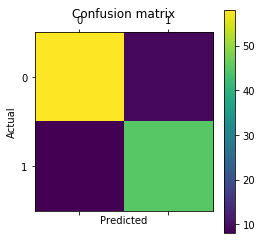

In [693]:
# trying out visualizing the confusion matrix that we looked at in class
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# shows high accuracy for our decision tree model

In [701]:
# looking at average accuracy score with decision tree model:
print(treeclf.score(bd_test, bd_target_test)) 

0.858333333333


In [703]:
print(treeclf.score(bd_train, bd_target_train)) 

0.989583333333


In [694]:
# For Bayesian: actually have different versions based on what kind of distribution you want to use on numeric attributes.  
# Default is to assume gaussian(normal).  

In [698]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bd_train, bd_target_train)
nbpreds_test = nbclf.predict(bd_test)
print(nbpreds_test)

['YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO']


In [704]:
print(nbclf.score(bd_train, bd_target_train)) 

0.664583333333


In [705]:
print(nbclf.score(bd_test, bd_target_test)) 

0.625


In [706]:
print(classification_report(bd_target_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.65      0.70      0.68        67
        YES       0.58      0.53      0.55        53

avg / total       0.62      0.62      0.62       120



In [707]:
nbcm = confusion_matrix(bd_target_test, nbpreds_test)
print(nbcm)

[[47 20]
 [25 28]]


Looking at the accuracy results from the decision tree classification and the naive bayes classification, I'm curious about over-fitting and underfitting in terms of bias-variance trade-off with regards to the decision-tree. I see that with naive bayes classification, the training and the test are pretty close in accuracy - I'm wondering if this would translate to other data well. We would need to pay attention to pruning, which we did with our algorithm by using the min_samples_split=3 argument.

#### d) Discuss your observations based on the above experiments.

My understanding of the classification algorithms and techniques from looking at the accuracy results, is that decision tree classification is most accurate with our data.  The other techniques were very close in accuracy.  This may be a concern and I would need to try various different pruning techniques to be assured that the classifier would translate well to various data.

#### 3) Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]

#### Your tasks in this problem are the following:

#### a ) Preprocessing and data analysis:
Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.
Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.
Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.
Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [712]:
# read in the data as a pandas DataFrame:
# but remove any '?' - I can see that there are some when I looked through the data

amtable = pd.read_csv("adult-modified.csv", na_values=["?"])
amtable.head(10)

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   
5  37.0   Private         14        Married  White  Female              40   
6  49.0   Private          5        Married  Black  Female              16   
7  52.0  Self-emp          9        Married  White    Male              45   
8  31.0   Private         14         Single  White  Female              50   
9  42.0   Private         13        Married  White    Male              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K  
5  <=50K  
6  <=50K  
7   >50K  
8   >50K  
9   >50K

In [711]:
amtable.describe(include='all')

age workclass  education marital-status   race    sex  \
count   9802.00      9412   10000.00          10000  10000  10000   
unique      NaN         3        NaN              2      5      2   
top         NaN   Private        NaN         Single  White   Male   
freq        NaN      6947        NaN           5017   8556   6703   
mean      38.45       NaN      10.08            NaN    NaN    NaN   
std       13.61       NaN       2.55            NaN    NaN    NaN   
min       17.00       NaN       1.00            NaN    NaN    NaN   
25%       27.00       NaN       9.00            NaN    NaN    NaN   
50%       37.00       NaN      10.00            NaN    NaN    NaN   
75%       47.00       NaN      12.00            NaN    NaN    NaN   
max       90.00       NaN      16.00            NaN    NaN    NaN   

        hours-per-week income  
count         10000.00  10000  
unique             NaN      2  
top                NaN  <=50K  
freq               NaN   7621  
mean             40.53    NaN  
std              12.28    NaN  
min               1.00    NaN  
25%              40.00    NaN  
50%              40.00    NaN  
75%              45.00    NaN  
max              99.00    NaN

In [713]:
# looking at count, we see that there are missing values in age and workclass 

In [714]:
amtable[amtable.age.isnull()] 
# shows us the id's where age is null

age workclass  education marital-status         race     sex  \
19    NaN  Self-emp         14         Single        White  Female   
27    NaN       NaN         10        Married        Asian    Male   
40    NaN   Private          5        Married        White    Male   
65    NaN   Private          9        Married        White    Male   
80    NaN   Private          9         Single        White    Male   
89    NaN    Public         16         Single        White  Female   
95    NaN    Public         10         Single        White    Male   
113   NaN   Private         10        Married        White  Female   
132   NaN  Self-emp          9        Married        White    Male   
147   NaN   Private          9        Married        White  Female   
159   NaN   Private         13         Single        Black    Male   
180   NaN    Public         10        Married        Black    Male   
192   NaN    Public         13        Married        Black    Male   
210   NaN    Public          9        Married        Black    Male   
234   NaN   Private         15         Single        White    Male   
255   NaN  Self-emp          9        Married        Asian    Male   
273   NaN    Public         14         Single        White    Male   
294   NaN   Private         13         Single        Black  Female   
300   NaN   Private         13        Married        White    Male   
301   NaN   Private         10         Single        Asian  Female   
319   NaN   Private          9        Married        White  Female   
499   NaN       NaN          9        Married        White    Male   
520   NaN  Self-emp         13        Married        White    Male   
592   NaN   Private          4         Single        White    Male   
625   NaN   Private          9         Single        Black    Male   
661   NaN   Private         14         Single        White    Male   
697   NaN   Private         14        Married        White    Male   
940   NaN   Private         12         Single  Amer-Indian  Female   
961   NaN   Private          9         Single        White  Female   
979   NaN   Private          9         Single        White    Male   
...   ...       ...        ...            ...          ...     ...   
8289  NaN  Self-emp          9        Married        White    Male   
8315  NaN   Private         10         Single        White    Male   
8399  NaN   Private          9         Single        White    Male   
8406  NaN    Public         10         Single        White  Female   
8517  NaN   Private          9         Single        White    Male   
8540  NaN    Public          9        Married        White    Male   
8621  NaN   Private         10        Married        White    Male   
8660  NaN  Self-emp          9        Married        White    Male   
8687  NaN   Private         13         Single        White  Female   
8774  NaN   Private          9        Married        White    Male   
8876  NaN  Self-emp          9         Single        White    Male   
8954  NaN       NaN         11        Married        White    Male   
8957  NaN  Self-emp         10        Married        White    Male   
8992  NaN   Private         10         Single        Asian    Male   
9001  NaN  Self-emp          9         Single        White    Male   
9025  NaN   Private          7        Married        White    Male   
9049  NaN   Private          9         Single        Black  Female   
9097  NaN    Public         14         Single        White  Female   
9164  NaN   Private         13        Married        White    Male   
9201  NaN   Private         13        Married        White  Female   
9228  NaN   Private         13        Married        White    Male   
9288  NaN    Public          9        Married        White    Male   
9465  NaN   Private          9        Married        White    Male   
9472  NaN   Private         10         Single        White    Male   
9936  NaN  Self-emp          9        Married        White    Male   
9944  NaN   Priv

In [715]:
# do the same for workclass
amtable[amtable.workclass.isnull()] 

age workclass  education marital-status         race     sex  \
27     NaN       NaN         10        Married        Asian    Male   
61    32.0       NaN          4        Married        White    Male   
69    25.0       NaN         10         Single        White    Male   
77    67.0       NaN          6        Married        White    Male   
106   17.0       NaN          6         Single        White  Female   
128   35.0       NaN          9        Married        White    Male   
149   43.0       NaN         10         Single        White  Female   
154   52.0       NaN          9         Single        White    Male   
160   68.0       NaN          2         Single        White  Female   
187   53.0       NaN         13         Single        White  Female   
201   19.0       NaN          9         Single        White    Male   
221   64.0       NaN          2         Single        White    Male   
226   60.0       NaN          6         Single  Amer-Indian  Female   
243   20.0       NaN         10         Single        White    Male   
266   19.0       NaN         10         Single        White    Male   
297   39.0       NaN         14        Married        Asian  Female   
312   19.0       NaN         10         Single        Black  Female   
326   23.0       NaN         11         Single        Black  Female   
346   67.0       NaN          7        Married        White    Male   
347   30.0       NaN         11         Single        White  Female   
354   59.0       NaN         13        Married        White    Male   
397   20.0       NaN          9         Single        White  Female   
408   28.0       NaN         10        Married        White  Female   
430   80.0       NaN          9        Married        White    Male   
431   17.0       NaN          7         Single        White    Male   
449   17.0       NaN          7         Single        White  Female   
459   32.0       NaN         10        Married        White    Male   
471   22.0       NaN         10         Single        White    Male   
484   52.0       NaN          8         Single        Black    Male   
486   63.0       NaN          2        Married        White    Male   
...    ...       ...        ...            ...          ...     ...   
9358  18.0       NaN          9         Single        White  Female   
9367  17.0       NaN          6         Single        White    Male   
9409  22.0       NaN         10         Single        White    Male   
9452  19.0       NaN         10         Single        White  Female   
9477  19.0       NaN         10         Single        White  Female   
9484  48.0       NaN          9        Married        White    Male   
9490  18.0       NaN         10         Single        White  Female   
9500  27.0       NaN          9        Married        White  Female   
9531  65.0       NaN          9        Married        White    Male   
9536  52.0       NaN         10        Married        White    Male   
9549  69.0       NaN         13        Married        White    Male   
9557  38.0       NaN          6         Single        White    Male   
9577  35.0       NaN          9        Married        White  Female   
9582  48.0       NaN         13        Married        White    Male   
9616  32.0       NaN          9        Married        White    Male   
9626  52.0       NaN         15        Married        Asian  Female   
9650  69.0       NaN         13        Married        White    Male   
9703  55.0       NaN         14        Married        White    Male   
9708  19.0       NaN          9         Single        White  Female   
9712  30.0       NaN          7         Single        White    Male   
9778  67.0       NaN          5        Married        White    Male   
9787  49.0       NaN         10         Single        White    Male   
9860  20.0       NaN         10         Single        Asian  Female   
9872  63.0       NaN          9        Married        Black  Female   
9885  68.0       NaN          9

In [716]:
# replace nan values for age with the mean
age_mean = amtable.age.mean()
amtable.age.fillna(age_mean, axis=0, inplace=True) 
# replacing original age value with mean - changes the original data

In [717]:
amtable.head(20)

age workclass  education marital-status         race     sex  \
0   39.00    Public         13         Single        White    Male   
1   50.00  Self-emp         13        Married        White    Male   
2   38.00   Private          9         Single        White    Male   
3   53.00   Private          7        Married        Black    Male   
4   28.00   Private         13        Married        Black  Female   
5   37.00   Private         14        Married        White  Female   
6   49.00   Private          5        Married        Black  Female   
7   52.00  Self-emp          9        Married        White    Male   
8   31.00   Private         14         Single        White  Female   
9   42.00   Private         13        Married        White    Male   
10  37.00   Private         10        Married        Black    Male   
11  30.00    Public         13        Married        Asian    Male   
12  23.00   Private         13         Single        White  Female   
13  32.00   Private         12         Single        Black    Male   
14  40.00   Private         11        Married        Asian    Male   
15  34.00   Private          4        Married  Amer-Indian    Male   
16  25.00  Self-emp          9         Single        White    Male   
17  32.00   Private          9         Single        White    Male   
18  38.00   Private          7        Married        White    Male   
19  38.45  Self-emp         14         Single        White  Female   

    hours-per-week income  
0               40  <=50K  
1               13  <=50K  
2               40  <=50K  
3               40  <=50K  
4               40  <=50K  
5               40  <=50K  
6               16  <=50K  
7               45   >50K  
8               50   >50K  
9               40   >50K  
10              80   >50K  
11              40   >50K  
12              30  <=50K  
13              50  <=50K  
14              40   >50K  
15              45  <=50K  
16              35  <=50K  
17              40  <=50K  
18              50  <=50K  
19              45   >50K

In [721]:
# drop the rows where workclass is nan
# in order to get rid of all nan values in dataFrame
amtable.drop(amtable[amtable.workclass.isnull()].index, axis=0, inplace=True)

In [722]:
amtable.shape

(9412, 8)

In [723]:
# some general statistics of table
# descriptive statistics for numerical attributes (rounded by 3 decimals for ease of reading):
amtable[['age', 'education', 'hours-per-week']].describe().round(3)

age  education  hours-per-week
count  9412.00    9412.00         9412.00
mean     38.37      10.12           41.08
std      12.96       2.54           11.88
min      17.00       1.00            1.00
25%      28.00       9.00           40.00
50%      37.00      10.00           40.00
75%      47.00      13.00           45.00
max      90.00      16.00           99.00

In [725]:
# basic correlation analysis of numerical values:
amtable[['age', 'education', 'hours-per-week']].corr()
# do not see much correlation between numerical values

age  education  hours-per-week
age             1.00       0.03            0.10
education       0.03       1.00            0.14
hours-per-week  0.10       0.14            1.00

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6107d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125398c90>]], dtype=object)

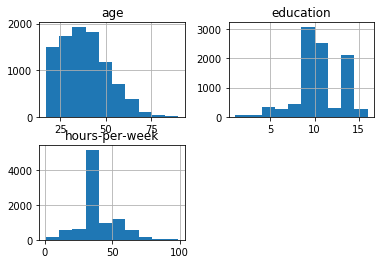

In [727]:
# histograms of numerical data showing distributions
amtable.hist()

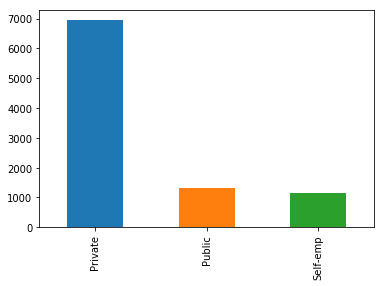

In [730]:
# bar graphs for categorical data
amtable["workclass"].value_counts().plot(kind='bar')

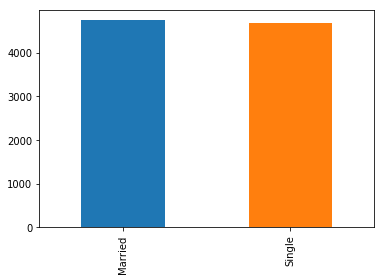

In [731]:
amtable["marital-status"].value_counts().plot(kind='bar')

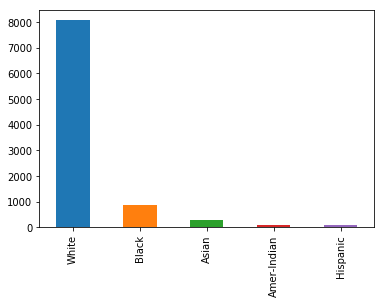

In [732]:
amtable["race"].value_counts().plot(kind='bar')

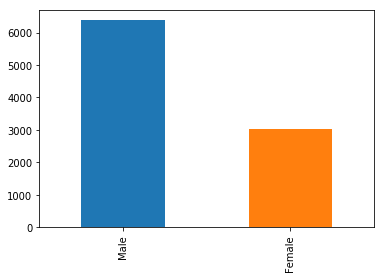

In [733]:
amtable["sex"].value_counts().plot(kind='bar')

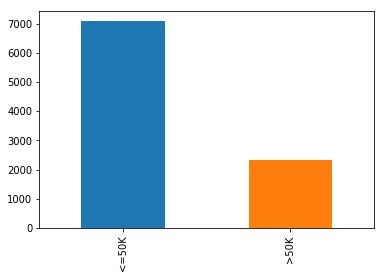

In [734]:
amtable["income"].value_counts().plot(kind='bar')

Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [736]:
x=pd.crosstab(amtable['education'], amtable['race']) 
x

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

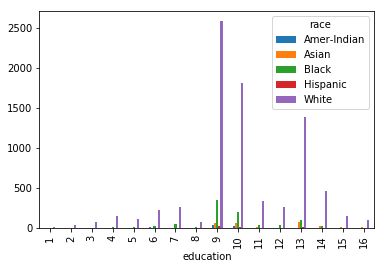

In [737]:
# plot a bar chart from above data

plt.show(x.plot(kind="bar"))

In [739]:
x=pd.crosstab(amtable['workclass'], amtable['income']) 
x

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

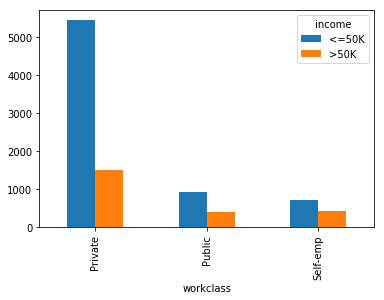

In [740]:
plt.show(x.plot(kind="bar"))

In [741]:
x=pd.crosstab(amtable['workclass'], amtable['race']) 
x

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

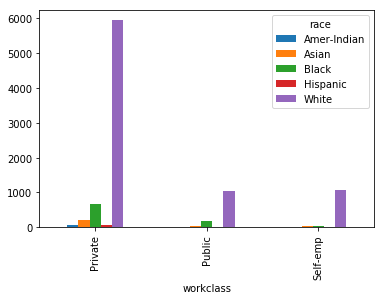

In [742]:
plt.show(x.plot(kind="bar"))

In [743]:
x=pd.crosstab(amtable['race'], amtable['income']) 
x

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

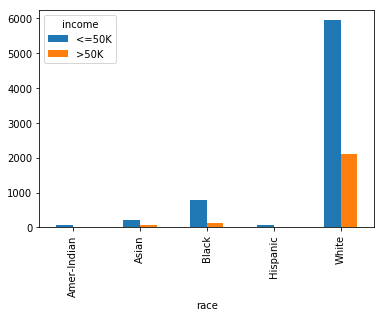

In [744]:
plt.show(x.plot(kind="bar"))

In [758]:
x['percentages_<=50K'] = x["<=50K"]/(x["<=50K"] + x[">50K"])
x

income       <=50K  >50K  percentages  percentages_<=50K
race                                                    
Amer-Indian     83     9         0.90               0.90
Asian          224    67         0.77               0.77
Black          773   119         0.87               0.87
Hispanic        69     6         0.92               0.92
White         5944  2118         0.74               0.74

In [760]:
x['percentages_>50K'] = x[">50K"]/(x["<=50K"] + x[">50K"])
x

income       <=50K  >50K  percentages  percentages_<=50K  percentages_>50K
race                                                                      
Amer-Indian     83     9         0.90               0.90              0.10
Asian          224    67         0.77               0.77              0.23
Black          773   119         0.87               0.87              0.13
Hispanic        69     6         0.92               0.92              0.08
White         5944  2118         0.74               0.74              0.26

In [761]:
x = x.drop(columns=['percentages'])

In [762]:
x

income       <=50K  >50K  percentages_<=50K  percentages_>50K
race                                                         
Amer-Indian     83     9               0.90              0.10
Asian          224    67               0.77              0.23
Black          773   119               0.87              0.13
Hispanic        69     6               0.92              0.08
White         5944  2118               0.74              0.26

From this analysis, I see that highest reported incomes within our data set are from people who identify as Asian or White.  The lowest incomes are reported from Hispanic and Amer-Indian participants in the data set.  I see that the sample set for both of these groups is very small though.

Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [763]:
x=pd.crosstab(amtable['workclass'], amtable['income']) 
x

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

In [764]:
x['percentages_<=50K'] = x["<=50K"]/(x["<=50K"] + x[">50K"])
x

income     <=50K  >50K  percentages_<=50K
workclass                                
Private     5443  1504               0.78
Public       925   392               0.70
Self-emp     725   423               0.63

In [765]:
x['percentages_>50K'] = x[">50K"]/(x["<=50K"] + x[">50K"])
x

income     <=50K  >50K  percentages_<=50K  percentages_>50K
workclass                                                  
Private     5443  1504               0.78              0.22
Public       925   392               0.70              0.30
Self-emp     725   423               0.63              0.37

In [766]:
# I see that there are higher percentages of people in all workclasses making less than or equal to 50K, with actually
# the most in private workclass

In [767]:
x=pd.crosstab(amtable['sex'], amtable['income']) 
x

income  <=50K  >50K
sex                
Female   2669   360
Male     4424  1959

In [768]:
x['percentages_<=50K'] = x["<=50K"]/(x["<=50K"] + x[">50K"])
x['percentages_>50K'] = x[">50K"]/(x["<=50K"] + x[">50K"])

In [769]:
x

income  <=50K  >50K  percentages_<=50K  percentages_>50K
sex                                                     
Female   2669   360               0.88              0.12
Male     4424  1959               0.69              0.31

In [770]:
# I do notice a pay gap within this dataset, although the number of male participants in the data
# is higher so it may not be representative of a larger population

In [771]:
x=pd.crosstab(amtable['marital-status'], amtable['income']) 
x

income          <=50K  >50K
marital-status             
Married          2730  2007
Single           4363   312

In [772]:
x['percentages_<=50K'] = x["<=50K"]/(x["<=50K"] + x[">50K"])
x['percentages_>50K'] = x[">50K"]/(x["<=50K"] + x[">50K"])

In [773]:
x

income          <=50K  >50K  percentages_<=50K  percentages_>50K
marital-status                                                  
Married          2730  2007               0.58              0.42
Single           4363   312               0.93              0.07

In [774]:
# Within our dataset, married people report higher income

In [775]:
x=pd.crosstab(amtable['education'], amtable['income']) 
x

income     <=50K  >50K
education             
1             12     0
2             45     1
3             76     5
4            164    16
5            135     7
6            245    23
7            310    14
8             93     7
9           2539   526
10          1737   388
11           298    91
12           221    83
13           921   656
14           225   290
15            45   126
16            27    86

In [776]:
x['percentages_<=50K'] = x["<=50K"]/(x["<=50K"] + x[">50K"])
x['percentages_>50K'] = x[">50K"]/(x["<=50K"] + x[">50K"])
x

income     <=50K  >50K  percentages_<=50K  percentages_>50K
education                                                  
1             12     0               1.00              0.00
2             45     1               0.98              0.02
3             76     5               0.94              0.06
4            164    16               0.91              0.09
5            135     7               0.95              0.05
6            245    23               0.91              0.09
7            310    14               0.96              0.04
8             93     7               0.93              0.07
9           2539   526               0.83              0.17
10          1737   388               0.82              0.18
11           298    91               0.77              0.23
12           221    83               0.73              0.27
13           921   656               0.58              0.42
14           225   290               0.44              0.56
15            45   126               0.26              0.74
16            27    86               0.24              0.76

In [777]:
# I see a strong positive correlation between education and income with more years of education leading to higher
# salaries

#### b) Predictive Modeling and Model Evaluation:

Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [779]:
# convert the table into standard spreadsheet format with dummie vars
amtable = pd.get_dummies(amtable)

amtable.head(10)

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   
5  37.0         14              40                  1                 0   
6  49.0          5              16                  1                 0   
7  52.0          9              45                  0                 0   
8  31.0         14              50                  1                 0   
9  42.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   
5                   0                       1                      0   
6                   0                       1                      0   
7                   1                       1                      0   
8                   0                       0                      1   
9                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   
5                 0           0           0              0           1   
6                 0           0           1              0           0   
7                 0           0           0              0           1   
8                 0           0           0              0           1   
9                 0           0           0              0           1   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0  
5           1         0             1            0  
6           1         0             1            0  
7           0         1             0            1  
8           1         0             0            1  
9           0         1             0            1

In [781]:
am_target = amtable['income_>50K']
am_target.head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income_>50K, dtype: uint8

In [782]:
amtable = amtable.drop(columns=['income_>50K', 'income_<=50K'])

In [783]:
amtable.head(10)

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   
5  37.0         14              40                  1                 0   
6  49.0          5              16                  1                 0   
7  52.0          9              45                  0                 0   
8  31.0         14              50                  1                 0   
9  42.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   
5                   0                       1                      0   
6                   0                       1                      0   
7                   1                       1                      0   
8                   0                       0                      1   
9                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   
5                 0           0           0              0           1   
6                 0           0           1              0           0   
7                 0           0           0              0           1   
8                 0           0           0              0           1   
9                 0           0           0              0           1   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0  
5           1         0  
6           1         0  
7           0         1  
8           1         0  
9           0         1

Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [784]:
from sklearn import tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [789]:
# split the data first
from sklearn.model_selection import train_test_split
am_train, am_test, am_target_train, am_target_test = train_test_split(amtable, am_target, test_size=0.2, random_state=33)

# in his notebooks, he uses a different function to split data, but it is deprecated
# now use .model_selection
print am_train.shape
print am_test.shape

(7529, 15)
(1883, 15)


In [790]:
# decision tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [791]:
treeclf = treeclf.fit(am_train, am_target_train)

In [792]:
# accuracy with our tree classifier
print treeclf.score(am_test, am_target_test)

0.775889537971


In [793]:
print treeclf.score(am_train, am_target_train)

0.93026962412


In [794]:
# Guassian Naive Bayes classifiers
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(am_train, am_target_train)
print "Score on Training: ", nbclf.score(am_train, am_target_train)
print "Score on Test: ", nbclf.score(am_test, am_target_test)

Score on Training:  0.720547217426
Score on Test:  0.719065321296


In [795]:
# very close accuracy with training and testing

In [796]:
# discriminant analysis:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(am_train, am_target_train)
print "Score on Training: ", ldclf.score(am_train, am_target_train)
print "Score on Test: ", ldclf.score(am_test, am_target_test)

Score on Training:  0.806348784699
Score on Test:  0.810939989379


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [797]:
# strangly, with discriminant analysis, test is higher accuracy than training data

In [798]:
# 10-fold cross validation
from sklearn import cross_validation

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [805]:
# cross-validation with decision tree model
cv_scores = cross_validation.cross_val_score(treeclf, amtable, am_target, cv=10)
cv_scores
# better to do multiple folds and each time do an evaluation on the test portions
# sklearn makes it very easy for us to do this
# passed the objects that we made earlier for each of the classifiers
# pass the full dataset - amtable
# pass the target
# specify the number of folds - 10
# train on 80, test on 20 and then do this again 5 times
# each time on a separate 80 and 20 percent of the data from the full dataset
# returns an array of test scores or classification scores

array([ 0.77,  0.76,  0.78,  0.78,  0.77,  0.75,  0.76,  0.8 ,  0.78,  0.76])

In [806]:
# average accuracies for each model:
print("Overall Accuracy with Decision Tree Model: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy with Decision Tree Model: 0.77 (+/- 0.02)


In [807]:
# cross-validation with discriminant analysis
cv_scores = cross_validation.cross_val_score(ldclf, amtable, am_target, cv=10)
cv_scores

array([ 0.81,  0.81,  0.79,  0.82,  0.81,  0.79,  0.8 ,  0.81,  0.82,  0.82])

In [808]:
print("Overall Accuracy with Discriminant Analysis: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy with Discriminant Analysis: 0.81 (+/- 0.02)


In [810]:
# cross-validation using Naive Bayes(Gaussian)
cv_scores = cross_validation.cross_val_score(nbclf, amtable, am_target, cv=10)
cv_scores

array([ 0.73,  0.7 ,  0.73,  0.7 ,  0.73,  0.71,  0.71,  0.72,  0.73,  0.71])

In [811]:
print("Overall Accuracy for Naive Bayes(Gu: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy for Naive Bayes(Gu: 0.72 (+/- 0.02)


For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [813]:
import graphviz

In [819]:
export_graphviz(treeclf,out_file='tree.png', feature_names=am_train.columns, class_names=["No","Yes"], filled=True) # adds color to nodes based on yes/no - colors get darker based on confidence

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)